In [1]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

fig_folder= r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2024\03_MAR_2024\food_for_thought_march14\figs\\"

In [4]:
dir(tp)

['Lickcalc',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ax2prop',
 'barscatter',
 'bonferroni_corrected_ttest',
 'burstlengthFig',
 'burstprobFig',
 'checknsessions',
 'discrete2continuous',
 'download_data',
 'event2sample',
 'fig_utils',
 'find_overlap',
 'findnoise',
 'findpercentilevalue',
 'fit_weibull',
 'flatten_list',
 'general_utils',
 'get_violinstats',
 'getuserhome',
 'ibiFig',
 'iliFig',
 'invisible_axes',
 'isnumeric',
 'lickCalc',
 'lick_figs',
 'lick_utils',
 'lickcalc',
 'licklengthFig',
 'lighten_color',
 'logical_subset',
 'lsd_pval',
 'makeheatmap',
 'makerandomevents',
 'mastersnipper',
 'mean_and_sem',
 'med_abs_dev',
 'medfilereader',
 'medfilereader_licks',
 'merge_fed_files',
 'merge_files',
 'metafile_utils',
 'metafilereader',
 'nanroc',
 'parse_args',
 'plot_ROC_and_line',
 'processdata',
 'random_array',
 'remcheck',
 'removenoise',
 'resample_snips',
 'rocN',
 'roc_utils'

In [111]:
%run ..//source//FED_functions.py

In [112]:

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"} 

# cell below plots the timeline of pellet delivery of male-female data <font color = "yellow">pooled for NRPR and PRNR mice </font>


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


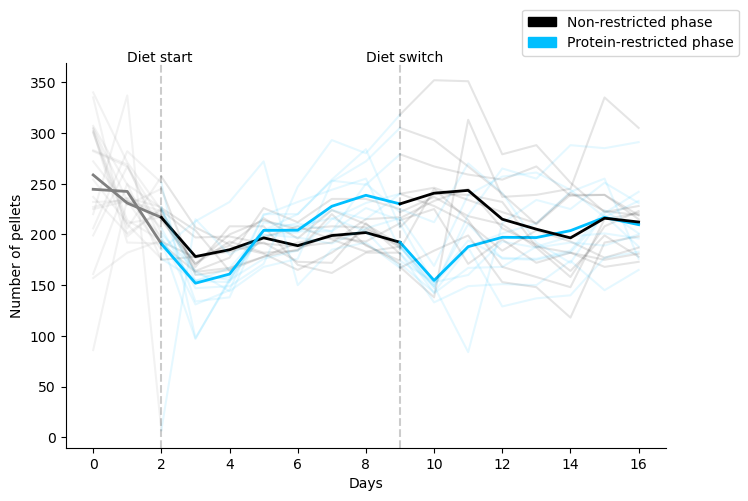

In [205]:
#plot shows timeline of total number of pellets delivered  per day in NRPR and PRNR male and Females pooled data
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.text(1, 370, "Diet start")
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)
    ax.text(8, 370, "Diet switch")
  
 

 
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=1, figsize=(8,5), gridspec_kw= {"left": 0.15})



pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Number of pellets",ax=ax)




ax.set_xlabel("Days", fontsize = 10)
#ax.set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")
#ax[0].set_title("Male", fontsize = 10, loc= "right")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)  



#legends
fed_cols = ["black", "deepskyblue"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1,1),
             bbox_transform=f.transFigure)

# fig_folder= r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Presentations\2024\03_MAR_2024\food_for_thought_march14\figs\\"
#f.savefig(fig_folder + "pellet_intake_timeline_diet_label.png", dpi=300, bbox_inches="tight")
f.savefig(fig_folder + "pellet_intake_timeline.pdf")


# cell below plots the timeline of pellet delivery of male-female data <font color = "yellow">pooled for NRPR and PRNR mice </font> and <font color = "red" >filters values under 100 and above 300 for a more pronounced visualization </font>


6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


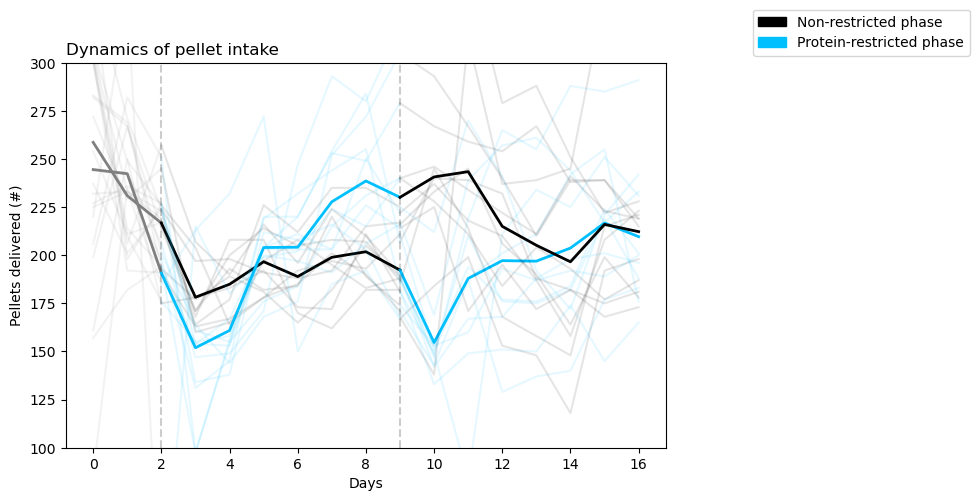

In [62]:
#plot shows timeline of total number of pellets delivered  per day in NRPR and PRNR male and Females pooled data
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=1, figsize=(8,5), gridspec_kw= {"left": 0.15})



pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Pellets delivered (#)",ax=ax)




ax.set_xlabel("Days", fontsize = 10)
ax.set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")
#ax[0].set_title("Male", fontsize = 10, loc= "right")
# Filter data below 100 and above 300 pellets
ax.set_ylim(bottom=100)
ax.set_ylim(top=300)   



#legends
fed_cols = ["black", "deepskyblue"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1,1),
             bbox_transform=f.transFigure)




# <font color = "yellow">Cell below plots a shadeerror figure of pellet intake - trend </font>
* turns out that it is not a good idea to show the data of 4 Epochs experiment, so I leave the code as it is and stop working on it at this stage

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


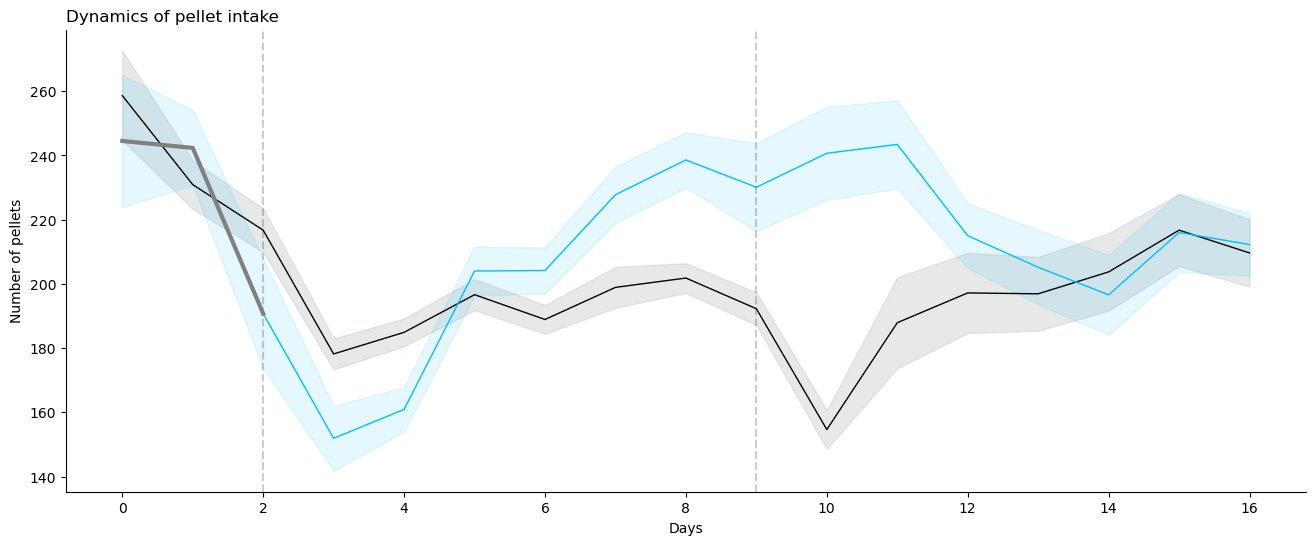

In [14]:
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

 
   

    return ax


####################################################
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)


#####################################################
pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Number of pellets",ax=ax)



#####################################################
f, ax = plt.subplots(figsize=(16,6), ncols=1)
                            # sharey=False,
                            # gridspec_kw={"width_ratios":[0.7,0.3],
                            #              "right":0.9, 
                            #             "wspace":0.4})
                            
tp.shadedError(ax,pooled_data_ctl, linecolor= "black")
tp.shadedError(ax,pooled_data_exp, linecolor= "deepskyblue",errorcolor= "deepskyblue", alpha= 0.1, linewidth=1)

ax.axvline(2, linestyle="--", color="k", alpha=0.2)
ax.axvline(9, linestyle="--", color="k", alpha=0.2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")


ax.set_ylabel("Number of pellets")
ax.set_xlabel("Days")

#adds highlight on the line plot for the first 3 days of training
df= pd.DataFrame(pooled_data_exp)
x=np.arange(0,3)
y=df.iloc[:,0:3].mean(axis=0)
ax.plot(x, y,
         linewidth=3,
         color="grey",
         linestyle="-")

# <font color = "cyan">Cell below plots trend of changes in bodyweight- pooled data of male and female </font>

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


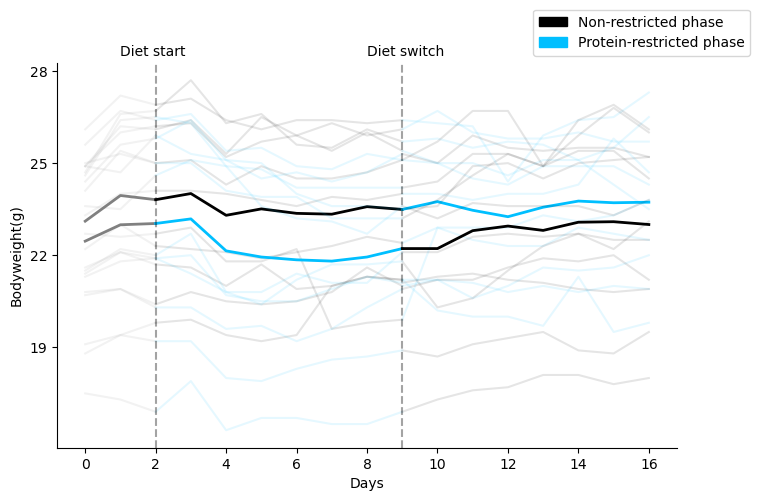

In [181]:
#plot shows timeline of body weights per day in NRPR and PRNR male and Females -- pooled data

def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel,fontsize = 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["bodyweight"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["bodyweight"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["bodyweight"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["bodyweight"], prnr_female_selector)

f, ax = plt.subplots(nrows=1, sharex=True, figsize=(8,5))



# concatanate the data of male and female in each group of NRPR and PRNR mice
pooled_data_ctl = np.concatenate((nrpr_m, nrpr_f))
pooled_data_exp = np.concatenate((prnr_m, prnr_f))
timeline_multicolor_fig([pooled_data_ctl,pooled_data_exp], colors=["black", "deepskyblue"], ylabel="Bodyweight(g)",ax=ax)


#legends
fed_cols = ["Black", "Deepskyblue"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1, 1),
             bbox_transform=f.transFigure)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xlabel("Days",fontsize = 10)
ax.set_yticks([19,22,25,28])
# ax.set_title("Male", fontsize = 10, loc= "left")


ax.axvline(2, linestyle="--", color="k", alpha=0.2)
ax.text(1, 28.5, "Diet start")
ax.axvline(9, linestyle="--", color="k", alpha=0.2)
ax.text(8, 28.5, "Diet switch")




f.savefig(fig_folder + "timeline_bodyweight.png")

In [163]:
df= pd.DataFrame(pooled_data_ctl)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,24.7,26.6,26.7,27.7,26.3,26.6,25.6,25.5,26.1,25.7,25.8,25.5,25.7,25.6,25.1,25.5,26.5
1,24.9,26.2,26.1,26.4,25.3,26.5,25.9,26.3,25.9,26.1,26.7,26.0,25.8,25.8,26.0,25.7,25.7
2,24.1,25.4,25.0,25.1,24.3,24.9,24.5,24.5,24.7,25.1,25.0,24.5,24.3,24.9,24.9,24.9,24.3
3,24.9,26.0,26.2,26.3,25.2,25.7,25.9,25.4,26.0,25.4,25.0,25.0,24.6,25.1,25.1,24.3,23.5
4,26.1,27.2,26.9,27.1,26.4,26.1,26.4,26.4,26.3,26.4,26.3,26.2,24.4,25.9,26.4,26.5,27.3
5,23.3,24.0,24.1,24.1,24.0,23.8,23.6,23.9,23.8,24.0,24.0,23.8,24.0,24.0,24.3,25.8,24.7
6,20.8,20.9,20.4,20.8,20.5,20.4,20.5,20.8,21.6,21.0,21.2,20.6,21.0,21.6,21.5,21.6,22.0
7,22.2,23.0,22.3,22.2,22.1,21.9,22.1,22.3,22.6,22.4,22.9,22.5,22.3,22.3,22.9,22.7,22.5
8,22.7,22.6,22.7,22.9,21.8,21.8,22.2,19.6,19.8,19.9,22.9,22.9,22.9,23.3,23.1,23.3,23.8
9,19.1,19.4,19.8,19.9,19.4,19.2,19.4,21.0,21.3,21.2,20.2,20.0,20.0,19.7,21.3,19.5,19.8


# <font color = "magenta">Cells below adding code from Jaime's BNA 2023 script to plot hoarding data and average of intake and microstructure  </font>

In [114]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import trompy as tp

In [115]:
DATA_FOLDER = "..\\data"
df = pd.read_csv(os.path.join(DATA_FOLDER, "FED001_042322_00.CSV"))

def tweak_fed(df):
    
    return (df
            .rename(columns={"MM:DD:YYYY hh:mm:ss": "t",
                             "InterPelletInterval": "ipi"})
            .assign(t=lambda df_: pd.to_datetime(df_.t))
            .set_index("t")
            .query("Event == 'Pellet'")
            .loc[:,"ipi"] # could use .loc[:,["ipi", "col2", "col5" etc]] to get mutliple columns, e.g. animal name etc
           )

pellets = tweak_fed(df) # could add animal name from metafile and diet and phase so these are returned in dataframe

In [116]:
# read in metafile and put pellets dataframe in keys of a dict
METAFILE = "..\\FEDProtein_METAFILE.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

ff_dict = {}
for row in rows:
    file, mouse, diet, mode, sex, order = row
    if (mode == "FF") and (diet in ["NR", "PR"]):
        key = "_".join([mouse, diet])
        ff_dict[key] = {}
        ff_dict[key]["mouse"] = mouse
        ff_dict[key]["diet"] = diet
        ff_dict[key]["sex"] = sex
        ff_dict[key]["pellets"] = tweak_fed(pd.read_csv(os.path.join(DATA_FOLDER, file)))
    


In [6]:
# f, ax = plt.subplots()
# data = sns.distplot(trans_ipis)
# ax.set_xlabel("Interpellet interval (minutes)")
# ax.set_xticks([-2, -1, 0, 1, 2, 3], labels=["0.01", "0.1", "1", "10", "100", "1000"])

# ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
# ax.text(0,1.8, "Meal threshold (1 min)", ha="center")

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# f.savefig(fig_folder + meal_def.png)

In [117]:
def make_ff_df(df, mouse, diet):
    """
    Takes df of pellets - time and IPIs - and returns row for collated df
    """
    out = pd.DataFrame.from_dict({"mouse": [mouse],
                                  "diet": [diet],
                                  "n_pellets": [len(df)],
                                  "n_meals": (df > 60).sum(),
                                  "session_time": (df.index[-1] - df.index[0]).total_seconds() / 60,
                                  "short_ipis": (df < 5).sum()
                                  })

    return (out
           .assign(meal_freq=lambda df_: 1 / (df_.session_time / df_.n_meals) * 60 * 24,
                   meal_size=lambda df_: df_.n_pellets / df_.n_meals,
                   )
           .astype({"diet": "category",
                    "n_pellets": "uint16",
                    "n_meals": "uint16"}))

ff = pd.DataFrame()

for key, val in ff_dict.items():
    
    pellets = val["pellets"]
    mouse = val["mouse"]
    diet = val["diet"]
    ff = pd.concat([ff, make_ff_df(pellets, mouse, diet)])
    
ff.reset_index(drop=True, inplace=True);


In [118]:
ff.groupby(by=["mouse", "diet"])

In [119]:
n_pellets = pd.pivot_table(ff, values="n_pellets", index="mouse", columns="diet")
meal_size = pd.pivot_table(ff, values="meal_size", index="mouse", columns="diet")
meal_freq = pd.pivot_table(ff, values="meal_freq", index="mouse", columns="diet")

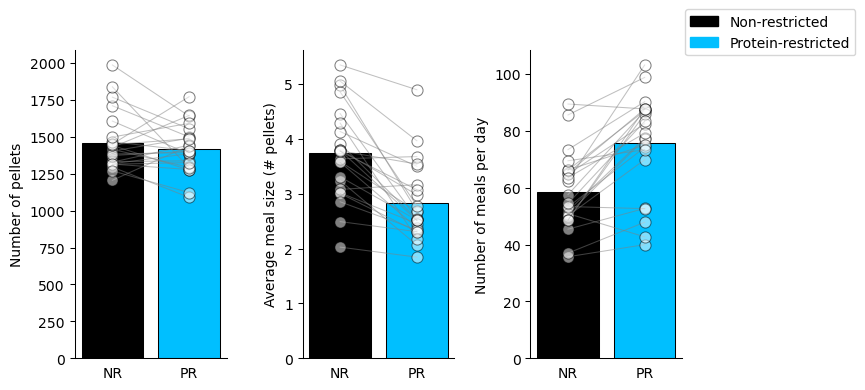

In [204]:
fed_cols = ["black", "deepskyblue"]
f, ax = plt.subplots(ncols = 3,
                     figsize=(9,4),
                     gridspec_kw={"wspace": 0.5, "right": 0.8})

for axis, vals in zip(ax, [n_pellets, meal_size, meal_freq]):
    tp.barscatter([vals.NR, vals.PR],
                  paired=True,
                  barfacecolor=fed_cols,
                  barfacecolor_option="individual",
                  barlabels=["NR", "PR"],
                  sc_kwargs={"alpha": 0.5},
                  ax=axis);
    
ax[0].set_ylabel("Number of pellets")
ax[1].set_ylabel("Average meal size (# pellets)")
ax[2].set_ylabel("Number of meals per day")

# legend
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted')

ax[2].legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1, 1),
             bbox_transform=f.transFigure)

#f.savefig(fig_folder + "meal_micro.png")
f.savefig(fig_folder + "meal_micro.pdf")


In [201]:
f.savefig??

Signature: f.savefig(fname, *, transparent=None, **kwargs)
Source:   
    def savefig(self, fname, *, transparent=None, **kwargs):
        """
        Save the current figure.

        Call signature::

          savefig(fname, *, dpi='figure', format=None, metadata=None,
                  bbox_inches=None, pad_inches=0.1,
                  facecolor='auto', edgecolor='auto',
                  backend=None, **kwargs
                 )

        The available output formats depend on the backend being used.

        Parameters
        ----------
        fname : str or path-like or binary file-like
            A path, or a Python file-like object, or
            possibly some backend-dependent object such as
            `matplotlib.backends.backend_pdf.PdfPages`.

            If *format* is set, it determines the output format, and the file
            is saved as *fname*.  Note that *fname* is used verbatim, and there
            is no attempt to make the extension, if any, of *fname* ma

In [121]:
HOARDING_METAFILE = "..\\FEDProtein_METAFILE.xls"
df = pd.read_excel(HOARDING_METAFILE, sheet_name="HOARDING")

def tweak_hoarding(df):
    
    return (df
            .drop(columns=["day0", "day1", "day2"])
            .rename(columns={"mouseid": "mouse"})
            .assign(
                    diet=["PRNR"] * 6 + ["NRPR"] * 6 + ["PRNR"] * 6 + ["NRPR"] * 5)
            .astype({"diet": "category"})
            .astype({"day{}".format(n): "int8" for n in range(3,17)})
           )
    
hoard = tweak_hoarding(df)


C:\Users\admin\AppData\Local\Temp\ipykernel_59940\1608756278.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  hoard_grouped = pd.pivot_table(hoard, index=["mouse", "diet"])
C:\Users\admin\AppData\Local\Temp\ipykernel_59940\1608756278.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  PRNR = hoard.groupby(by="diet").mean(numeric_only=True).loc["PRNR"]
C:\Users\admin\AppData\Local\Temp\ipykernel_59940\1608756278.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

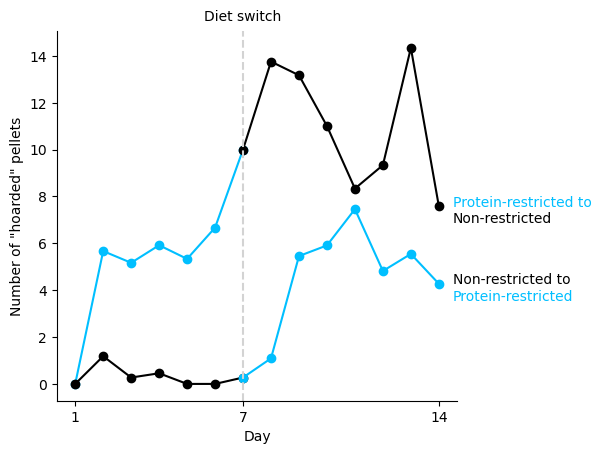

In [206]:
hoard_grouped = pd.pivot_table(hoard, index=["mouse", "diet"])

fed_cols = ["black", "deepskyblue"]

PRNR = hoard.groupby(by="diet").mean(numeric_only=True).loc["PRNR"]
NRPR = hoard.groupby(by="diet").mean(numeric_only=True).loc["NRPR"]

PRNR_sem = hoard.groupby(by="diet").sem(numeric_only=True).loc["PRNR"]

ph1_x = range(0,7)
ph2_x = range(6,14)

f, ax = plt.subplots(gridspec_kw={"right": 0.75})

ax.plot(ph1_x, PRNR[:7], color=fed_cols[1], marker="o")
ax.plot(ph2_x, PRNR[6:], color=fed_cols[0], marker="o")

ax.plot(ph1_x, NRPR[:7], color=fed_cols[0], marker="o")
ax.plot(ph2_x, NRPR[6:], color=fed_cols[1], marker="o")

ax.text(13.5, PRNR[-1], "Protein-restricted to", color=fed_cols[1])
ax.text(13.5, PRNR[-1]-0.7, "Non-restricted", color=fed_cols[0])

ax.text(13.5, NRPR[-1], "Non-restricted to", color=fed_cols[0])
ax.text(13.5, NRPR[-1]-0.7, "Protein-restricted", color=fed_cols[1])

ax.set_ylabel('Number of "hoarded" pellets')
ax.set_xticks([0, 6, 13], labels=["1", "7", "14"])
ax.set_xlabel("Day")


ax.axvline(6, color="lightgrey", linestyle="--")
ax.text(6, 15.5, "Diet switch", ha="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#f.savefig(fig_folder + "hoarding.png")
f.savefig(fig_folder + "hoarding.pdf")

In [72]:
# read in metafile and put pellets dataframe in keys of a dict
METAFILE = "..\\FEDProtein_METAFILE.xls"
rows, header = tp.metafilereader(METAFILE, sheetname="METAFILE")

def tweak_eco(df, event="Left"):
    
    return (df
            .rename(columns={"MM:DD:YYYY hh:mm:ss": "t"})
            .assign(t=lambda df_: pd.to_datetime(df_.t))
            .set_index("t")
            .query("Event == @event")
            .loc[:,"FR"]           
           )

eco_dict = {}
for row in rows:
    file, mouse, diet, mode, sex, order = row
    if (mode == "ECO") and (diet in ["PR", "RICH"]):
        key = "_".join([mouse, diet])
        eco_dict[key] = {}
        eco_dict[key]["mouse"] = mouse
        eco_dict[key]["diet"] = diet
        eco_dict[key]["sex"] = sex
        eco_dict[key]["FR"] = tweak_eco(pd.read_csv(os.path.join(DATA_FOLDER, file)))
    

In [73]:
def get_FR_reset_index(df):
    
    return (df
            .reset_index()
            .query("FR == 1")
            .reset_index()
            ["index"]   
           )

def get_breakpoints(df):
    
    return (df
            .iloc[get_FR_reset_index(df)[1:] - 1]
           )

def make_eco_df(df, mouse, diet):
    """
    Takes df of FRs and returns row for collated df
    """
    out = pd.DataFrame.from_dict({"mouse": [mouse],
                                  "pellet_type": [diet],
                                  "n_pellets": [(df == 1).sum()],
                                  "breakpoint": [np.mean(get_breakpoints(df))]
                                 }
                                )

    return (out
           .astype({"pellet_type": "category",
                    "n_pellets": "uint16",
                    })
           )
                                  
eco_df = pd.DataFrame()

for key, val in eco_dict.items():
    
    fr = val["FR"]
    mouse = val["mouse"]
    diet = val["diet"]
    eco_df = pd.concat([eco_df, make_eco_df(fr, mouse, diet)])
    
eco_df.reset_index(drop=True, inplace=True);
eco_df = eco_df.assign(diet=["NR"] * 12 + ["PR"] * 12)


In [74]:
n_pellets = pd.pivot_table(eco_df, values="n_pellets", index=["mouse", "diet"], columns="pellet_type")
breakpoint = pd.pivot_table(eco_df, values="breakpoint", index=["mouse", "diet"], columns="pellet_type")
# meal_freq = pd.pivot_table(ff, values="meal_freq", index="mouse", columns="diet")

In [22]:
#breakpoint.xs("NR", level=1)

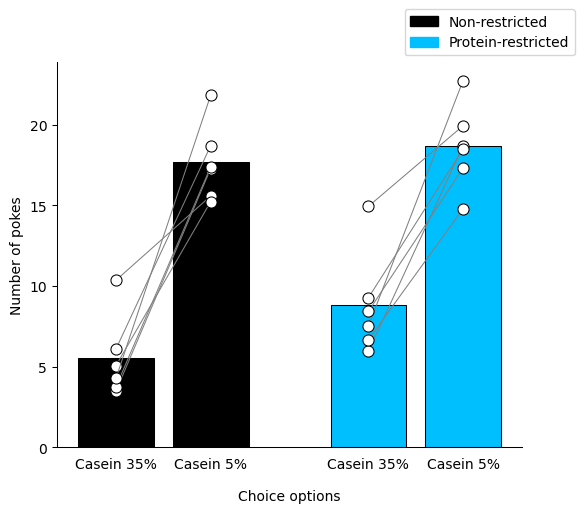

In [208]:
fed_cols = ["black", "black", "deepskyblue", "deepskyblue"]
f, ax = plt.subplots(ncols = 1,
                     figsize=(6,5),
                     gridspec_kw={"wspace": 0.9})


NR = breakpoint.xs("NR", level=1)
PR = breakpoint.xs("PR", level=1)

tp.barscatter([[NR.RICH, NR.PR],
               [PR.RICH, PR.PR]
              ],
              paired=True,
              barfacecolor=fed_cols,
              barfacecolor_option="individual",
              barlabels=["Casein 35%", "Casein 5%", "Casein 35%", "Casein 5%"],
              ax=ax);


ax.set_ylabel("Number of pokes")
ax.set_xlabel("Choice options", labelpad = 30)
#ax.axhline(5.5, color="magenta")




NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted')
PR_patch = mpatches.Patch(color=fed_cols[2], label='Protein-restricted')
ax.legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1, 1),
             bbox_transform=f.transFigure)

#f.savefig(fig_folder + "breakpoint.png")
#f.savefig(fig_folder + "breakpoint.tif")
f.savefig(fig_folder + "breakpoint.pdf")

# <font color = violet>Cells below plot intermeal interval KDE plot - def a meal </font>

In [182]:
def interpellet_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", **kwargs):
    """
    FED3 Viz: Plot a histogram of interpellet intervals for multiple devices.
    Parameters
    ----------
    FEDs : list of FED3_File objects
        FED3 files (loaded by load.FED3_File)
    kde : bool
        Whether or not to include kernel density estimation, which plots
        probability density (rather than count) and includes a fit line (see
        seaborn.distplot)
    **kwargs :
        ax : matplotlib.axes.Axes
            Axes to plot on, a new Figure and Axes are
            created if not passed
        date_filter : array
            A two-element array of datetimes (start, end) used to filter
            the data
        **kwargs also allows FED3 Viz to pass all settings to all functions.
    Returns
    -------
    fig : matplotlib.figure.Figure
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)
    print(colors)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):

        y = tp.flatten_list(group)
        y = [np.log10(val*60) for val in y if val > 0]
            
        sns.kdeplot(y, ax=ax,
                    color=colors[idx],
                    fill=fill,
                    label=labels[idx],
                    linestyle=linestyle)

    ax.set_ylabel('Density Estimation',fontsize = 18)
    ax.set_xlabel('Minutes between pellets',fontsize = 18)

    ax.set_xticks(range(-2,4))
    ax.set_xticklabels([10**num for num in range(-2,4)])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

6 items in output dictionary
6 items in output dictionary
6 items in output dictionary
6 items in output dictionary
['green', 'red']
['green', 'red']


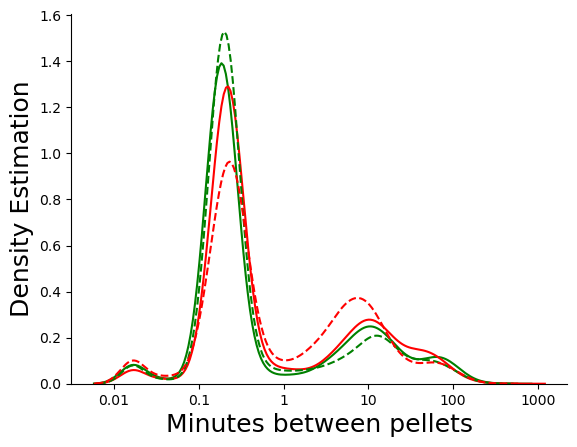

In [183]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}

IPIs_m_nrpr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], nrpr_male_selector)
IPIs_m_nrpr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], nrpr_male_selector)

IPIs_m_prnr_pr = get_data_fields(mice, ["interpellet_intervals_pr"], prnr_male_selector)
IPIs_m_prnr_nr = get_data_fields(mice, ["interpellet_intervals_nr"], prnr_male_selector)

f, ax = plt.subplots()

interpellet_interval_plot([IPIs_m_nrpr_nr, IPIs_m_nrpr_pr],
                           colors=["green", "red"],
                           linestyle="-",
                           ax=ax)

interpellet_interval_plot([IPIs_m_prnr_nr, IPIs_m_prnr_pr],
                           colors=["green", "red"],
                           linestyle="--",
                           ax=ax)

['black']


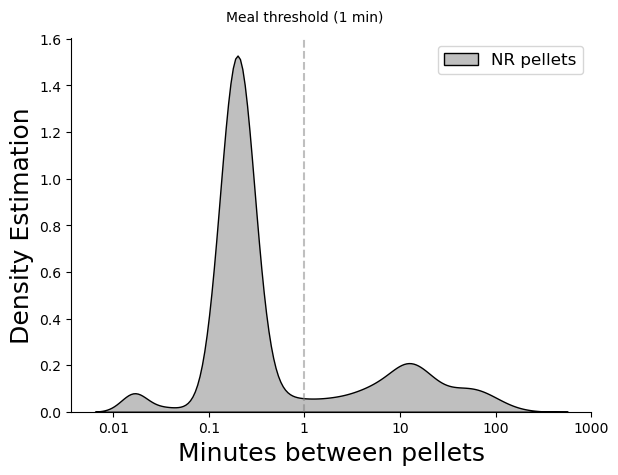

In [200]:
f, ax = plt.subplots(figsize = (8,5.5), gridspec_kw= {"left":0.25,"bottom": 0.2})

interpellet_interval_plot([IPIs_m_prnr_nr],
                           colors=["black", ],
                           labels=["NR pellets"],
                           linestyle="-",
                           fill=True,
                           ax=ax)

# interpellet_interval_plot([IPIs_m_prnr_pr],
#                            colors=["deepskyblue"],
#                            labels=["PR pellets"],
#                            linestyle="--",
#                            fill=False,
#                            ax=ax)

ax.legend(fontsize = 12)
ax.axvline(0, linestyle="--", color="grey", alpha=0.5)
ax.text(0,1.68, "Meal threshold (1 min)", ha="center")

f.savefig(fig_folder + "IPI_male_PRNR_NRpellets.png")